In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

In [4]:
file = 'Amazon_Electronics_products.json'

with open(file) as f:
    df = pd.DataFrame(json.loads(line) for line in f)

In [5]:
df.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [6]:
df.shape

(1689188, 9)

### Get time

In [14]:
def getTime(time):
    date,year = time.split(',')
    month,day = date.split(' ')
    return day, month, year

In [15]:
df['day'],df['month'],df['year'] = zip(*df['reviewTime'].apply(lambda x: getTime(x)))  

In [18]:
df['year'] = df['year'].astype('int')

In [19]:
print(df['year'].min())
print(df['year'].max())

1999
2014


(array([7.20000e+01, 8.17000e+02, 1.60900e+03, 2.31500e+03, 3.54700e+03,
        5.15900e+03, 9.63800e+03, 1.54470e+04, 3.59760e+04, 4.98720e+04,
        7.06660e+04, 1.03797e+05, 1.73395e+05, 2.82942e+05, 9.33936e+05]),
 array([1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
        2008., 2009., 2010., 2011., 2012., 2013., 2014.]),
 <a list of 15 Patch objects>)

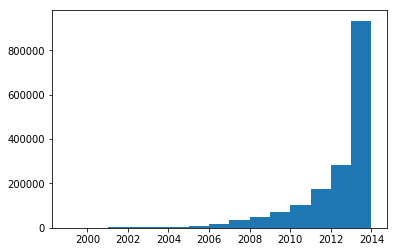

In [23]:
plt.figure()
plt.hist(df['year'],bins=15,range=(1999,2014))

In [26]:
df_sub = df[df['year']>2012]

In [27]:
df_sub.shape

(933936, 12)

(array([ 51764.,  41152.,  76696., 764324.]),
 array([1., 2., 3., 4., 5.]),
 <a list of 4 Patch objects>)

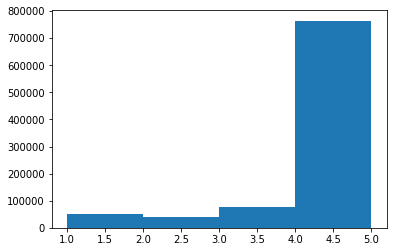

In [31]:
plt.hist(df_sub['overall'],bins=4,range=(1,5))

In [34]:
df_sub.to_csv('Amazon electronic products reviews_2013-2014.csv')